# Bostan House Price Prediction Using Machine Learning

In [2]:
# import necessary packeges
import numpy as np
import pandas as pd

#import packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import packages for bostopn Dataset
from sklearn.datasets import load_boston

In [3]:
boston=load_boston()

In [4]:
#first,check what contains in the boston dataset
boston.keys()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
#create a dataframe that consists the features columns
df=pd.DataFrame(boston.data,columns=boston.feature_names)

In [6]:
#check the dataframe
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
#create another dataframe that consists the Target value
y=pd.DataFrame(boston.target,columns=["target"])

In [8]:
y.head()

,target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [9]:
#merge two dataframe that consist feature columns and target column in a single dataframe
df=pd.concat([df,y],axis=1)

In [10]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [11]:
#check the datatype first
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
target     506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


In [12]:
#check the shape of the dataset
df.shape

(506, 14)

In [13]:
# statistics for Boston House Prices
print("Maximum Price:" +str(np.max(df['target'])))
print("Minimum Price:" +str(np.min(df['target'])))

Maximum Price:50.0
Minimum Price:5.0


# Exploratory Data Analysis

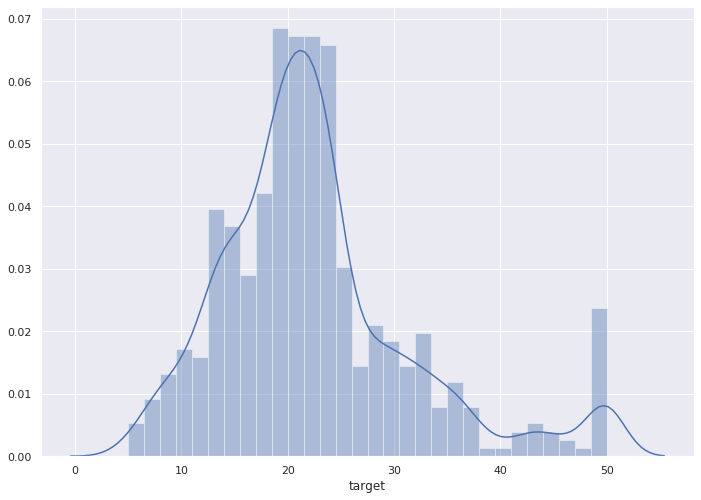

In [34]:
# Distribution graph
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df['target'], bins=30,)
plt.show()

We see that the values of target are distributed normally with few outliers.
Next, we create a correlation matrix that measures the linear relationships between the variables.

### feature selection

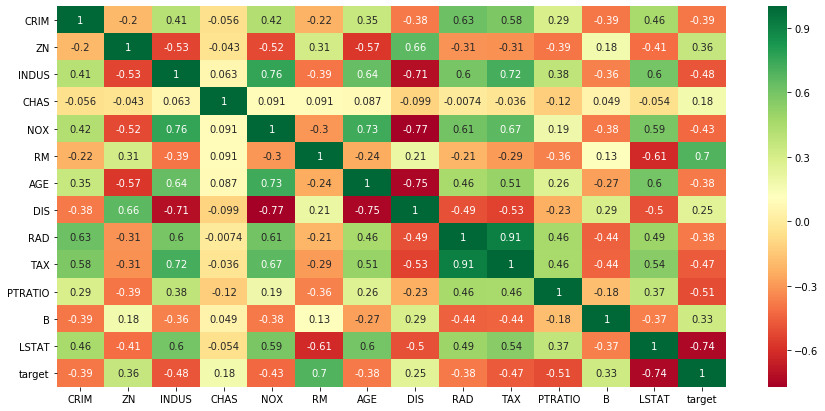

In [24]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,7))
#plot heat mapfeature selection machine learningfeature selection machine learning
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

To fit a linear regression model, we select those features which have a high correlation with our target variable. By looking at the correlation matrix we can see that RM has a strong positive correlation with target variable (0.7) where as LSTAT has a high negative correlation with target variable(-0.74).

## Normalization

In [187]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
features=scaler.fit_transform(df[["LSTAT"]])

In [112]:
#features=df[["LSTAT","RM"]]
#target=y

Text(0, 0.5, 'Target')

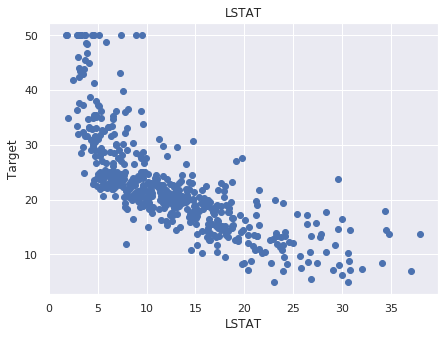

In [188]:
# graphn for LSTAT
plt.figure(figsize=(7,5))
plt.scatter(df["LSTAT"],Y ,marker='o')
plt.title("LSTAT")
plt.xlabel("LSTAT")
plt.ylabel('Target')

## Splitting the data into training and testing sets

In [191]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(features, Y, test_size = 0.3, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(354, 1)
(152, 1)
(354, 1)
(152, 1)


In [192]:
X_test

array([[-1.33488380e+00],
       [-1.11481096e+00],
       [-5.38696714e-01],
       [ 3.10021470e+00],
       [-8.51284251e-01],
       [ 1.96060184e+00],
       [-9.83047608e-01],
       [-6.45228790e-01],
       [-3.49462107e-01],
       [ 2.39267783e-01],
       [-9.05952027e-01],
       [-4.08335096e-01],
       [-3.76095126e-01],
       [-8.02223427e-01],
       [-6.90084400e-01],
       [ 2.37408957e-03],
       [ 3.04414519e+00],
       [ 8.78800974e-02],
       [ 1.18964603e+00],
       [-3.56470796e-01],
       [ 2.38673014e+00],
       [-2.14895275e-01],
       [-1.19330828e+00],
       [-3.21427350e-01],
       [-6.73263546e-01],
       [ 1.56110656e+00],
       [-8.10633854e-01],
       [-8.59353940e-02],
       [-9.77440656e-01],
       [-1.00407368e+00],
       [ 1.78818809e+00],
       [ 1.58633784e+00],
       [ 5.18213612e-01],
       [ 5.72881388e-01],
       [-5.58321044e-01],
       [-5.50971616e-02],
       [-4.36369852e-01],
       [ 1.64521083e+00],
       [-9.4

## Training and testing the model

In [193]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [194]:
y_train_predict = lin_model.predict(X_train)

In [195]:
y_test_predict = lin_model.predict(X_test)

In [196]:
lin_model.score(X_test,y_test_predict)

1.0

In [197]:
# model evaluation for training set
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5.942398232895452
R2 score is 0.5576990599447105


The model performance for testing set
--------------------------------------
RMSE is 6.777234336301446
R2 score is 0.5169602987600738


In [201]:
Y_test=np.array(Y_test)

In [212]:
final=pd.DataFrame(list(zip(X_test,Y_test,y_test_predict)),columns=["X","Actual Value","predicted Value"])

In [213]:
final

,X,Actual Value,predicted Value
0,[-1.334883803808312],[37.6],[31.357068552593375]
1,[-1.1148109639123658],[27.9],[29.884727279574292]
2,[-0.5386967142484557],[22.6],[26.03038165402752]
3,[3.100214702120183],[13.8],[1.6851718148075179]
4,[-0.8512842511707231],[35.2],[28.12166893990813]
5,[1.960601843295952],[10.4],[9.309461336874492]
6,[-0.9830476075415445],[23.9],[29.003198109741213]
7,[-0.6452287896120984],[29.0],[26.743107365807457]
8,[-0.34946210669461664],[22.8],[24.764355718628945]
9,[0.23926778347288252],[23.2],[20.825608364055604]


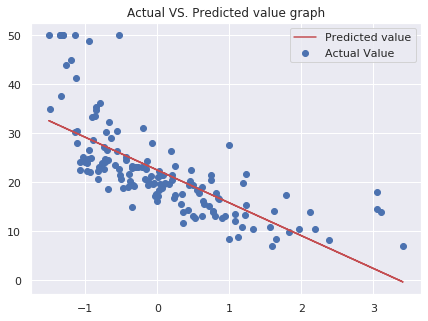

In [226]:
plt.figure(figsize=(7,5))
plt.scatter(final["X"],final["Actual Value"],color="b")
plt.plot(final["X"],final["predicted Value"],color="r")
plt.xlabel("")
plt.legend(["Predicted value","Actual Value"])
plt.title("Actual VS. Predicted value graph")
plt.show()